In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [2]:
prob = 0
for i in range(13):
    power = 0.5**(24-i)
    comb = math.comb(24-i,i)
    prob += power * comb
print(prob)

0.6666666865348816


In [3]:
# function to calculate the probability of landing on the number m according to my formula in the rubric
# returns a single value probability
# math.comb only accepts integer values so cannot accept arrays as inputs
def my_formula(m):
    # only difference between odd and even m is the number of terms i.e. endpoint
    if m % 2 == 1:
        k = 1
    else:
        k = 0
    end = int((m+k)/2)
    # I calculate the sum in the same manner as before
    prob = 0
    for i in range(end):
        power = 0.5**(m-1-i)
        comb = math.comb(m-1-i,i)
        prob += power * comb
    return prob

# function to produce array of values of my function evaluated from m1+1 to m2
def my_formula_m1_to_m2(m1,m2,my_formula):
    dist = np.zeros(m2-m1)
    for j in range(m1,m2):
        dist[j-m1] = my_formula(j+1)
    return dist

In [4]:
# to check I get the same value for m=25
my_formula(25)

0.6666666865348816

In [5]:
# function that simulates the stepping game until you reach step n or step n-1
# returns an array where the value indexed i will return 1 if the number i+1 was stepped on, and 0 otherwise 
def sim(m):
    dist = np.zeros(m)
    dist[0] = 1
    jump = 1
    for i in range(m):
        # terminates if next step is outside the index range
        if jump +2 > m:
            return dist
        l = jump + 1
        u = l + 2
        jump = rng.integers(low=l, high=u, size=1)[0]
        dist[jump-1] += 1
    return dist

# function that simulates n simulations of sim(m)
# returns array of distributions (i.e. percent of times that number was landed on)
def n_sims(m,sim,n):
    dist = np.zeros(m)
    for i in range(n):
        dist += sim(m)
    return dist / n

In [6]:
# calculating the probability of each step for my function and the simulation up to m steps
# using n simulations
m = 30
n = 10000
dist_my_formula = my_formula_m1_to_m2(0,m,my_formula)
dist_sims = n_sims(m,sim,n)

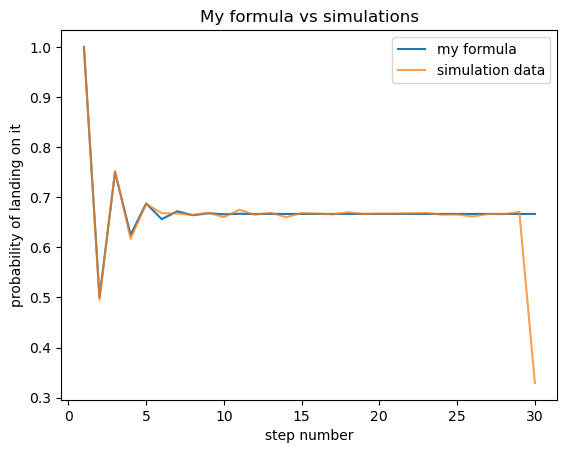

In [7]:
# plotting this data on a graph
step = np.linspace(1,m,m)
plt.plot(step,dist_my_formula,label='my formula')
plt.plot(step,dist_sims,label='simulation data',alpha=0.75)
plt.xlabel('step number')
plt.ylabel('probability of landing on it')
plt.title('My formula vs simulations')
plt.legend()
plt.show()

In [8]:
# seperating the values for odd and even m
k = int(m/2)
odd = np.zeros(k)
odd_steps = np.zeros(k)
even = np.zeros(k)
even_steps = np.zeros(k)
for i in range(k):
    i_2 = 2*i
    odd[i] = dist_my_formula[i_2]
    even[i] = dist_my_formula[i_2+1]
    odd_steps[i] = step[i_2]
    even_steps[i] = step[i_2+1]

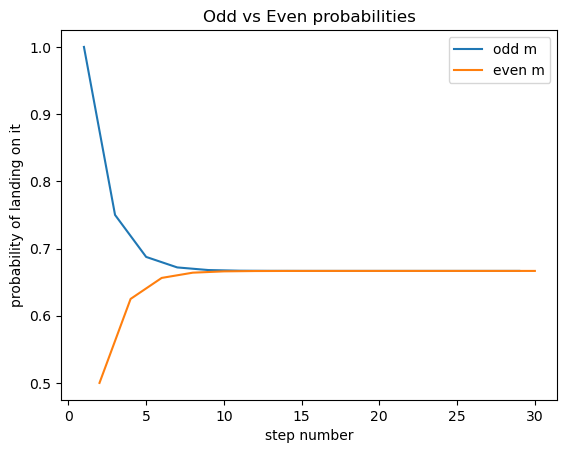

In [9]:
# plotting the results
plt.plot(odd_steps,odd,label='odd m')
plt.plot(even_steps,even,label='even m')
plt.xlabel('step number')
plt.ylabel('probability of landing on it')
plt.title('Odd vs Even probabilities')
plt.legend()
plt.show()

In [10]:
my_formula_m1_to_m2(10,20,my_formula)

array([0.66699219, 0.66650391, 0.66674805, 0.66662598, 0.66668701,
       0.66665649, 0.66667175, 0.66666412, 0.66666794, 0.66666603])

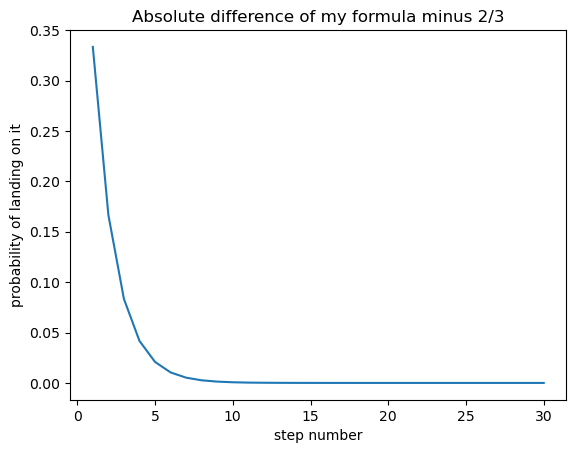

In [11]:
# code to graph the absolute difference between my formula and 2/3
plt.plot(step,np.abs(dist_my_formula-(2/3)))
plt.xlabel('step number')
plt.ylabel('probability of landing on it')
plt.title('Absolute difference of my formula minus 2/3')
plt.savefig('test1.png') 
plt.show()

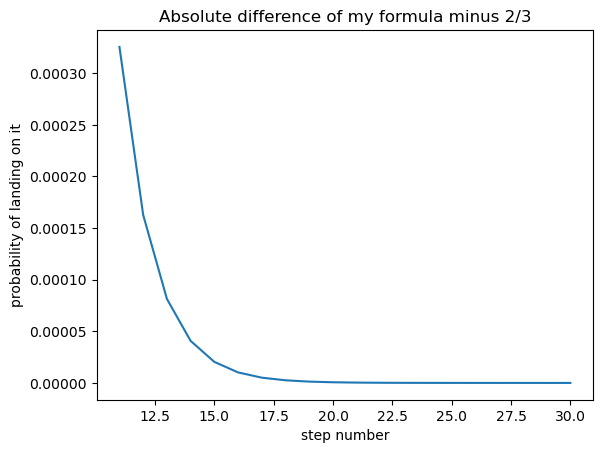

In [12]:
# as above except now looking at larger values along x-axis to zoom in
plt.plot(step[10:30],np.abs(dist_my_formula[10:30]-(2/3)))
plt.xlabel('step number')
plt.ylabel('probability of landing on it')
plt.title('Absolute difference of my formula minus 2/3')
plt.show()

In [13]:
# function of my explicit solution to P(x=m)
def my_sol(m):
    a = (-1)**m
    b = 2**(1-m)
    c = a*b
    d = 2 - c
    return d/3

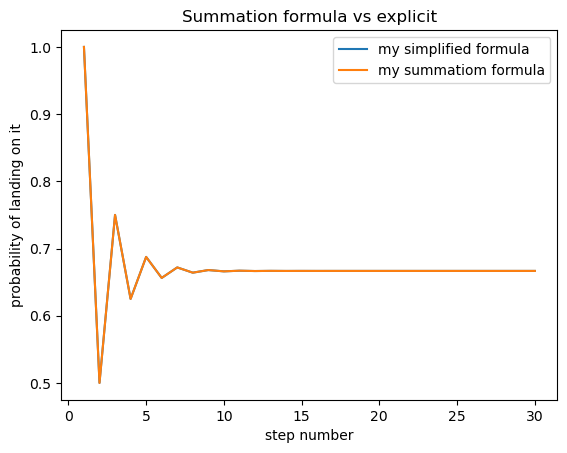

In [14]:
# code to compare the graph of my summation formula vs explicit formula
sol = my_sol(step)
plt.plot(step,sol,label='my simplified formula')
plt.plot(step,dist_my_formula,label='my summatiom formula')
plt.xlabel('step number')
plt.ylabel('probability of landing on it')
plt.title('Summation formula vs explicit')
plt.legend()
plt.show()

In [15]:
# sum of the absolute errors between my summation function and explicit function
sum(np.abs(sol-dist_my_formula))

0.0